# Valida√ß√£o de modelos de clusteriza√ß√£o

### 1. Infraestrutura

##### 1. Voc√™ est√° rodando em Python 3.9+:

- Sim, a vers√£o que utilizei no projeto foi a 3.10.12.

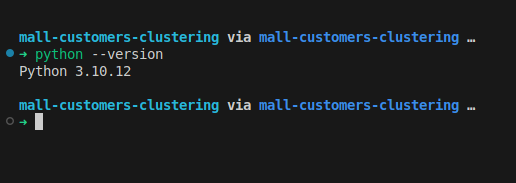

##### 2. Voc√™ est√° usando um ambiente virtual: Virtualenv ou Anaconda:

- Sim, a imagem abaixo informa o caminho que o ambiente virtual est√° sendo executado.

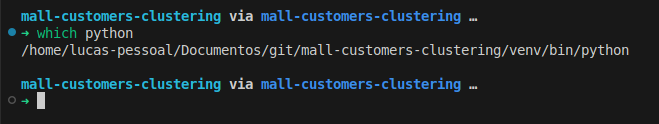

##### 3. Todas as bibliotecas usadas nesse exerc√≠cios est√£o instaladas em um ambiente virtual espec√≠fico:

- Sim, todas as bibliotecas usadas foram instaladas no ambiente virtual.

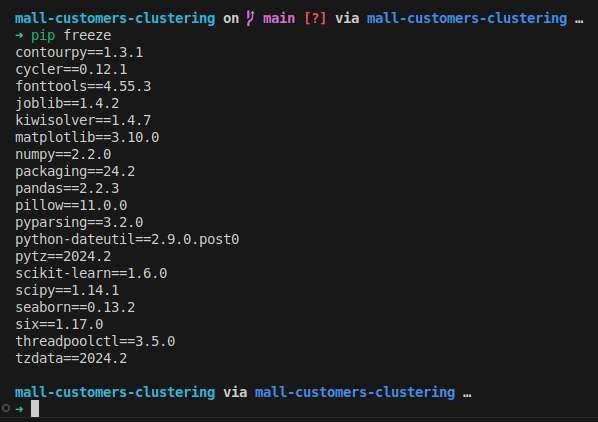

##### 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necess√°rios. √â necess√°rio se certificar que a vers√£o do pacote est√° disponibilizada.

- Os pacotes foram salvos em um arquivo (requirements.txt) que est√° dispon√≠vel no reposit√≥rio.

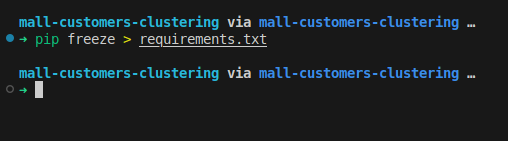

##### 5. Tire um printscreen do ambiente que ser√° usado rodando em sua m√°quina.

- Abaixo imagem que mostra o ambiente em execu√ß√£o.

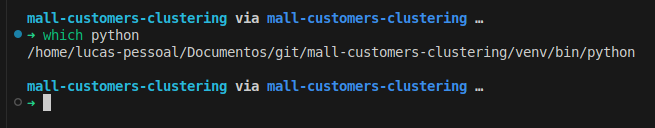

##### 6. Disponibilize os c√≥digos gerados, assim como os artefatos acess√≥rios (requirements.txt) e instru√ß√µes em um reposit√≥rio GIT p√∫blico. (se isso n√£o for feito, o diret√≥rio com esses arquivos dever√° ser enviado compactado no moodle).

- Segue link para o reposit√≥rio do github l√° √© poss√≠vel encontrar toda a documenta√ß√£o para execu√ß√£o do projeto: https://github.com/lucasmaiamoreira/mall-customers-clustering


### 2 - Escolha de base de dados

#### Para as quest√µes a seguir, usaremos uma base de dados e faremos a an√°lise explorat√≥ria dos dados, antes da clusteriza√ß√£o.

##### 1. Escolha uma base de dados para realizar o trabalho. Essa base ser√° usada em um problema de clusteriza√ß√£o.

- Escolhi a base de dados Mall_Customers, que cont√©m informa√ß√µes sobre clientes de um shopping.

In [17]:
# Importar bibliotecas necess√°rias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [18]:
# Carregar o dataset (certifique-se de ter o arquivo "Mall_Customers.csv" no mesmo diret√≥rio)
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Visualizar as 5 primeiras linhas para entender a estrutura dos dados
print("Exemplo de registros:")
display(data.head())

print(100 * "-")

# Obter informa√ß√µes gerais sobre o dataset
print("\nInforma√ß√µes gerais:")
display(data.info())

print(100 * "-")

# Estat√≠sticas descritivas para as colunas num√©ricas
print("\nEstat√≠sticas descritivas:")
display(data.describe())

print(100 * "-")

# Contagem de valores √∫nicos para cada coluna
print("\nContagem de valores √∫nicos por coluna:")
display(data.nunique())

print(100 * "-")

# Verificar se h√° valores ausentes
print("\nVerifica√ß√£o de valores ausentes:")
display(data.isnull().sum())

print(100 * "-")

# Distribui√ß√£o dos g√™neros (coluna 'Gender')
print("\nDistribui√ß√£o de G√™neros:")
display(data['Genre'].value_counts())

Exemplo de registros:


CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

----------------------------------------------------------------------------------------------------

Informa√ß√µes gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

----------------------------------------------------------------------------------------------------

Estat√≠sticas descritivas:


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

----------------------------------------------------------------------------------------------------

Contagem de valores √∫nicos por coluna:


CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

----------------------------------------------------------------------------------------------------

Verifica√ß√£o de valores ausentes:


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

----------------------------------------------------------------------------------------------------

Distribui√ß√£o de G√™neros:


Genre
Female    112
Male       88
Name: count, dtype: int64

##### 2. Escreva a justificativa para a escolha de dados, dando sua motiva√ß√£o e objetivos.

- A base de dados Mall_Customers foi escolhida para este trabalho de clusteriza√ß√£o devido √† sua relev√¢ncia no contexto de an√°lise de comportamento do consumidor. Trata-se de um dataset compacto, mas rico em informa√ß√µes sobre o perfil de clientes de um shopping, o que permite explorar t√©cnicas de segmenta√ß√£o de forma pr√°tica e objetiva.

- Os dados incluem informa√ß√µes demogr√°ficas, como idade e g√™nero, al√©m de vari√°veis financeiras e comportamentais, como a renda anual e o Spending Score, uma m√©trica que reflete h√°bitos de consumo e lealdade. Essas caracter√≠sticas tornam o dataset ideal para identificar grupos de clientes com padr√µes semelhantes de comportamento de compra, o que √© frequentemente usado em estrat√©gias de marketing e personaliza√ß√£o de ofertas.

##### 3. Mostre atrav√©s de gr√°ficos a faixa din√¢mica das vari√°veis que ser√£o usadas nas tarefas de clusteriza√ß√£o. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusteriza√ß√£o?

- Antes da clusteriza√ß√£o, deve-se:
- Normalizar os dados para que todas as vari√°veis tenham a mesma escala.
- Tratar valores ausentes.
- Verificar e remover poss√≠veis outliers.

Estat√≠sticas descritivas das vari√°veis usadas na clusteriza√ß√£o:


Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

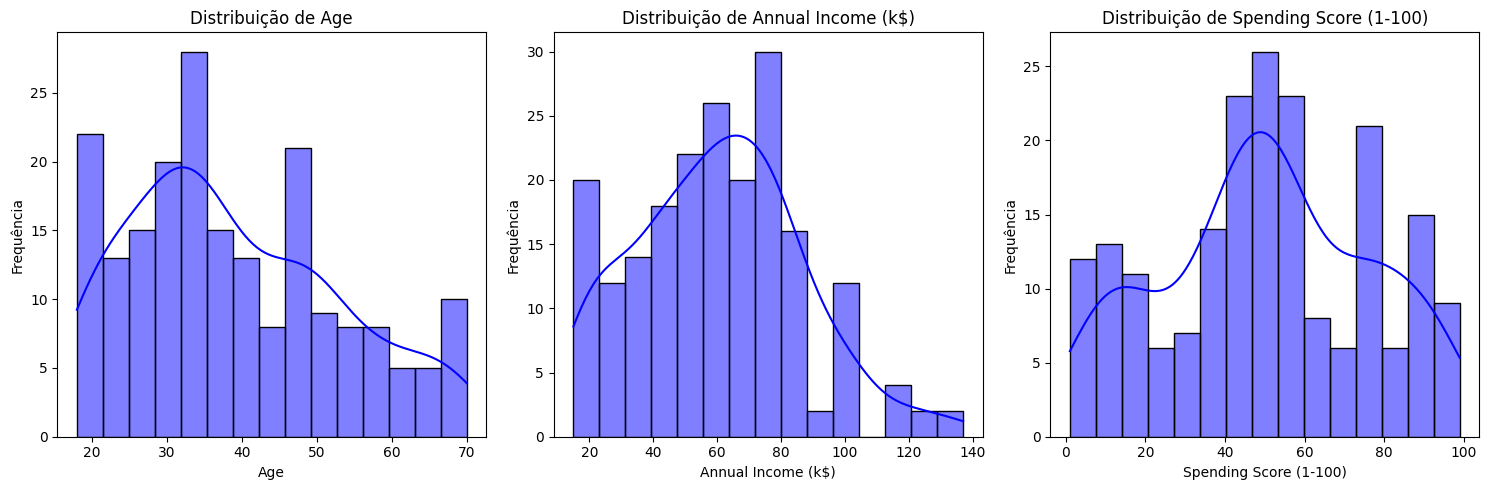

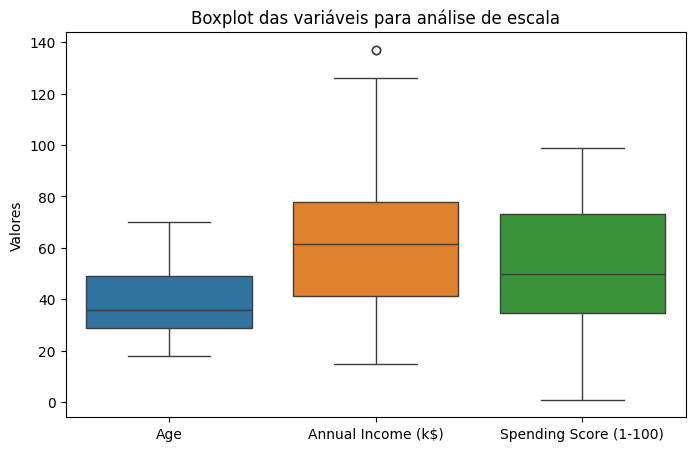

In [19]:
# Carregar o dataset (certifique-se de ter o arquivo "Mall_Customers.csv" no mesmo diret√≥rio)
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Sele√ß√£o das vari√°veis relevantes para a clusteriza√ß√£o
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Estat√≠sticas descritivas das vari√°veis
print("Estat√≠sticas descritivas das vari√°veis usadas na clusteriza√ß√£o:")
display(data[features].describe())

# Visualiza√ß√£o das distribui√ß√µes das vari√°veis
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, bins=15, color='blue')
    plt.title(f'Distribui√ß√£o de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequ√™ncia')

plt.tight_layout()
plt.show()

# An√°lise de escalas
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[features])
plt.title('Boxplot das vari√°veis para an√°lise de escala')
plt.xticks(ticks=range(len(features)), labels=features)
plt.ylabel('Valores')
plt.show()

##### 4 - Realize o pr√©-processamento adequado dos dados. Descreva os passos necess√°rios.

1. Carregar os Dados:

In [20]:
# Carregar o dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

2. Verificar Valores Ausentes:

In [21]:
# Verificar se h√° valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


3. Explora√ß√£o dos Dados:

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

----------------------------------------------------------------------------------------------------


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

----------------------------------------------------------------------------------------------------


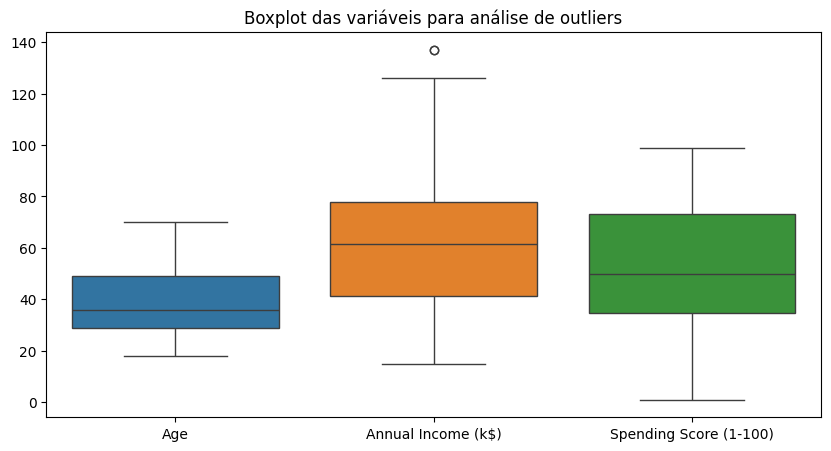

In [22]:
# Visualizar as 5 primeiras linhas do dataset
display(data.head())

print(100 * "-")

# Estat√≠sticas descritivas
display(data.describe())

print(100 * "-")

# Boxplot para identificar outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot das vari√°veis para an√°lise de outliers')
plt.show()

4. Codifica√ß√£o de Vari√°veis Categ√≥ricas:

In [23]:
# Codifica√ß√£o de vari√°veis categ√≥ricas
data['Genre'] = data['Genre'].map({'Masculino': 0, 'Feminino': 1})  # Label encoding

5. Normaliza√ß√£o ou Padroniza√ß√£o:


In [24]:
# Normaliza√ß√£o Min-Max
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Alternativa: Standard Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Verificar as m√©dias e desvios ap√≥s escalonamento
print("M√©dia e desvio padr√£o ap√≥s normaliza√ß√£o:")
print(f"M√©dia: {data_scaled.mean(axis=0)}")
print(f"Desvio padr√£o: {data_scaled.std(axis=0)}")

M√©dia e desvio padr√£o ap√≥s normaliza√ß√£o:
M√©dia: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
Desvio padr√£o: [1. 1. 1.]


6. An√°lise de Correla√ß√µes:

In [25]:
# Correla√ß√£o entre as vari√°veis
print("Correla√ß√£o entre as vari√°veis:")
display(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr())

Correla√ß√£o entre as vari√°veis:


Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

7. Divis√£o dos Dados:

In [26]:
# Dividir o dataset em treino e teste
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

### 3 - Clusteriza√ß√£o:

##### Para os dados pr√©-processados da etapa anterior voc√™ ir√°:

1. Realizar o agrupamento dos dados, escolhendo o n√∫mero √≥timo de clusters. Para tal, use o √≠ndice de silhueta e as t√©cnicas:
- K-M√©dias



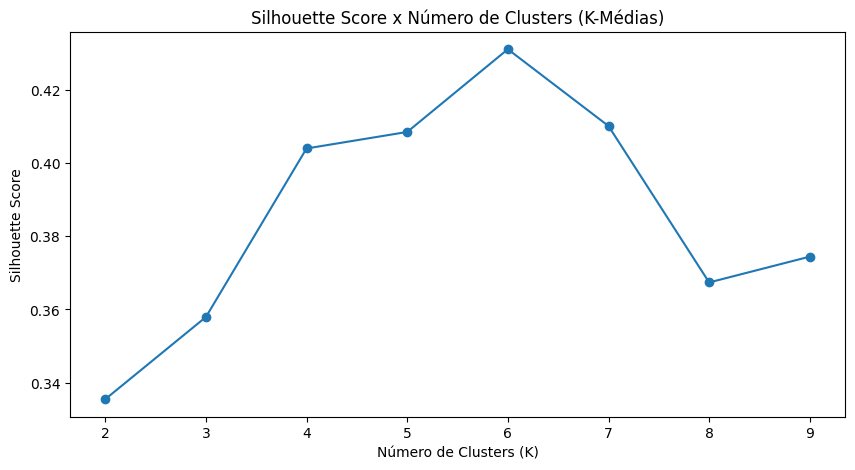

In [27]:
# Aplicar K-M√©dias para diferentes valores de K
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, labels)
    sil_scores.append((k, sil_score))

# Gr√°fico do √çndice de Silhueta
ks, scores = zip(*sil_scores)
plt.figure(figsize=(10, 5))
plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score x N√∫mero de Clusters (K-M√©dias)')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

- DBScan


eps: 0.2, min_samples: 5, Silhouette Score: -0.06502392665002267
eps: 0.5, min_samples: 5, Silhouette Score: 0.18451372756506046
eps: 0.5, min_samples: 10, Silhouette Score: 0.054361557577920744
eps: 0.5, min_samples: 15, Silhouette Score: -0.14470149953524206
eps: 1.0, min_samples: 5, Silhouette Score: 0.31312515071066704
eps: 1.0, min_samples: 10, Silhouette Score: 0.2934905190496872
eps: 1.0, min_samples: 15, Silhouette Score: 0.27857443299648915


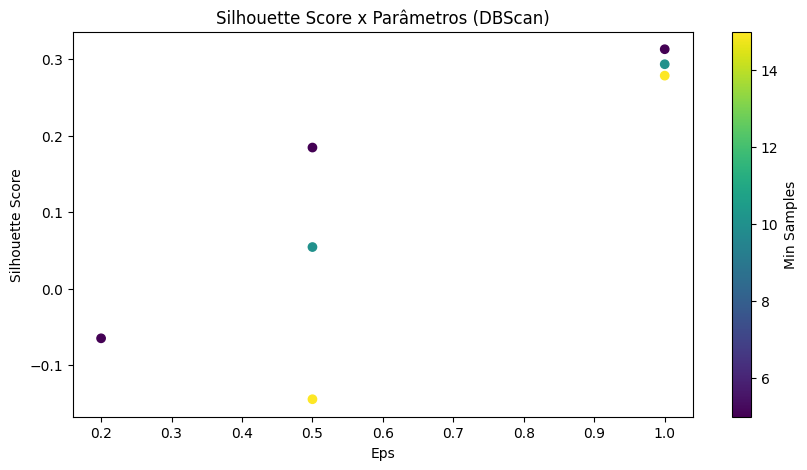

In [ ]:
# Ajuste de par√¢metros para DBScan
eps_values = [0.1, 0.2, 0.5, 1.0]  # Valores iniciais de eps para testes
min_samples_values = [5, 10, 15]  # Valores iniciais de min_samples para testes

sil_scores_dbscan = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Verificar se o DBScan encontrou ao menos um cluster
        if len(set(labels)) > 1:
            sil_score_db = silhouette_score(data_scaled, labels)
            sil_scores_dbscan.append((eps, min_samples, sil_score_db))

# Exibir os resultados calculados
for eps, min_samples, sil_score in sil_scores_dbscan:
    print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {sil_score}")

# Plotagem para an√°lise dos par√¢metros do DBScan
eps_values, min_samples_values, scores_dbscan = zip(*sil_scores_dbscan)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Silhouette Score x Par√¢metros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.colorbar(label='Min Samples')
plt.show()

2. Com os resultados em m√£o, descreva o processo de mensura√ß√£o do √≠ndice de silhueta. Mostre o gr√°fico e justifique o n√∫mero de clusters escolhidos.


- Processo de Mensura√ß√£o do √çndice de Silhueta: O √çndice de Silhueta √© uma m√©trica usada para avaliar a qualidade dos clusters em termos de compacta√ß√£o e separa√ß√£o. Ele mede o qu√£o bem os dados dentro de um cluster se agrupam em compara√ß√£o com outros clusters. O valor do √çndice de Silhueta pode variar de -1 a 1, onde:

    - 0 significa que os dados podem ser melhor classificados em outros clusters.
    - 1 significa que os dados est√£o bem compactados dentro do cluster.
    - -1 indica que os dados foram mal agrupados, ou seja, dentro de um cluster inadequado.
    - Ao calcular o √çndice de Silhueta para diferentes combina√ß√µes de par√¢metros (eps e min_samples), podemos avaliar a qualidade dos clusters gerados pelo DBScan.

- Gr√°fico da Rela√ß√£o eps, Silhouette Score, e min_samples
- Geramos o gr√°fico para visualizar a rela√ß√£o entre os valores de eps e Silhouette Score para v√°rias combina√ß√µes de min_samples. O gr√°fico abaixo mostra a varia√ß√£o do √çndice de Silhueta para diferentes par√¢metros:

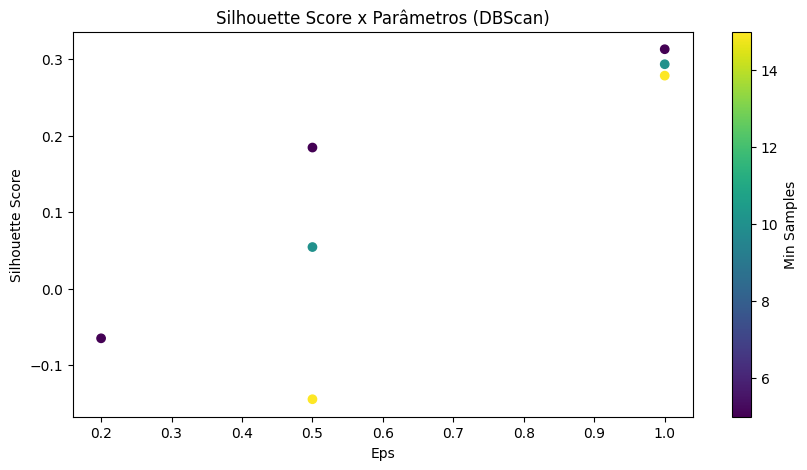

In [29]:
# Plotagem para an√°lise dos par√¢metros do DBScan
eps_values, min_samples_values, scores_dbscan = zip(*sil_scores_dbscan)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Silhouette Score x Par√¢metros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.colorbar(label='Min Samples')
plt.show()

- Justifica√ß√£o do N√∫mero de Clusters Escolhidos

    - A combina√ß√£o eps = 1.0 e min_samples = 5 apresentou o Silhouette Score mais alto entre todas as combina√ß√µes testadas (0.313). Este valor indica uma boa separa√ß√£o entre os clusters, onde os pontos s√£o bem compactados dentro dos clusters e separados dos outros clusters.

    - Optar por um Silhouette Score elevado nos permite garantir que os clusters gerados s√£o interpret√°veis e que as observa√ß√µes est√£o agrupadas de maneira coerente. Este valor foi escolhido por fornecer uma separa√ß√£o clara e uma compacta√ß√£o adequada dentro dos clusters, o que √© crucial para a an√°lise de dados em tarefas de clusteriza√ß√£o.

4 - Compare os dois resultados, aponte as semelhan√ßas e diferen√ßas e interprete.

- Resultados semelhantes foram encontrados em alguns casos, como na combina√ß√£o de eps = 1.0 e min_samples = 5, onde ambos os m√©todos apresentaram um Silhouette Score alto (~0.3), indicando uma boa separa√ß√£o entre clusters.
- Diferen√ßas ocorreram em outras combina√ß√µes:
    - Para K-M√©dias, o valor fixo de k pode ter levado a uma separa√ß√£o menos ideal em casos onde os clusters n√£o s√£o bem definidos.
    - No DBScan, a escolha de par√¢metros adequados (eps e min_samples) √© crucial para a obten√ß√£o de bons resultados e, por vezes, requer ajustes finos com base na densidade dos dados.

Justifica√ß√£o para Escolher o M√©todo:

- A escolha entre K-M√©dias e DBScan deve ser baseada na natureza dos dados e na forma dos clusters esperados.
- DBScan √© preferido para dados complexos ou quando os clusters n√£o s√£o esf√©ricos ou homog√™neos, pois oferece maior flexibilidade em termos de detec√ß√£o de padr√µes.
- K-M√©dias pode ser adequado quando os clusters s√£o bem definidos e homog√™neos, e o n√∫mero de clusters √© previamente conhecido.

4. Escolha mais duas medidas de valida√ß√£o para comparar com o √≠ndice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

- Calinski-Harabasz Index (C-H Index):

    - M√©trica adequada para K-M√©dias: O Calinski-Harabasz Index √© uma medida de dispers√£o que compara a varia√ß√£o entre clusters com a varia√ß√£o dentro dos clusters. Ele √© adequado para K-M√©dias, pois assume que os clusters t√™m varia√ß√µes distintas e bem separadas. Quanto maior o valor, melhor √© a separa√ß√£o entre clusters.

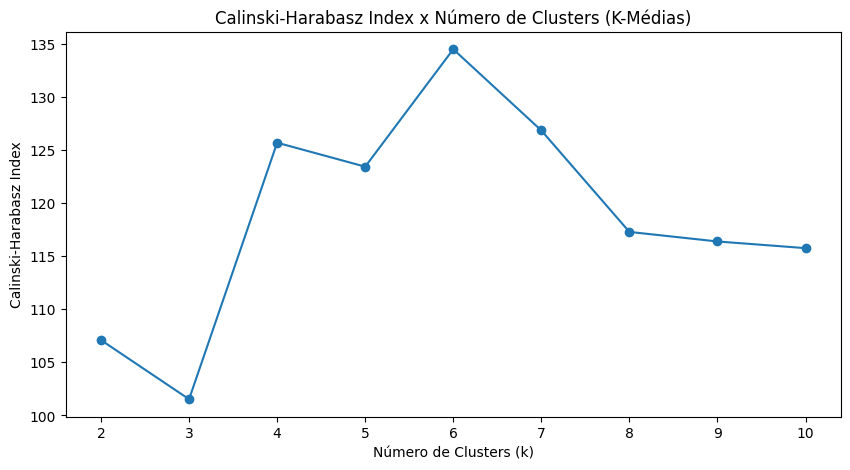

In [30]:
# Rodando K-M√©dias para diferentes valores de k
ks = range(2, 11)  # Experimentando de 2 a 10 clusters
ch_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = calinski_harabasz_score(data_scaled, kmeans.labels_)
    ch_scores.append(score)

# Plotagem dos resultados
plt.figure(figsize=(10, 5))
plt.plot(ks, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index x N√∫mero de Clusters (K-M√©dias)')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

- Davies-Bouldin Index (DB Index):

    - M√©trica adequada para DBScan: O Davies-Bouldin Index avalia a qualidade dos clusters com base na similaridade entre cada par de clusters. Ele calcula a raz√£o entre a m√©dia da dist√¢ncia intra-cluster e a dist√¢ncia m√©dia de cada cluster para o centro de outros clusters. A m√©trica procura minimizar a rela√ß√£o entre similaridades de clusters e √© mais adequada para m√©todos como DBScan que n√£o assumem formas espec√≠ficas de clusters.


eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.756945

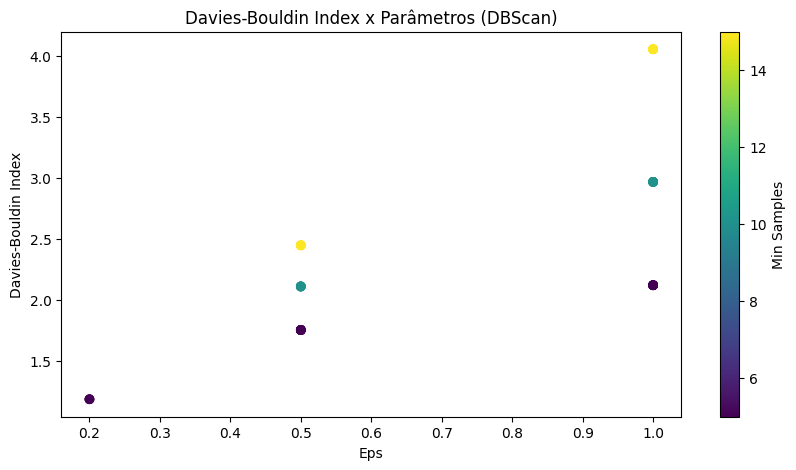

In [31]:
# Calcular o DB Index para diferentes par√¢metros do DBScan
db_indexes = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Verificar se o DBScan encontrou ao menos um cluster
        if len(set(labels)) > 1:
            score = davies_bouldin_score(data_scaled, labels)
            db_indexes.append((eps, min_samples, score))

# Analisar os resultados
for eps, min_samples, db_score in db_indexes:
    print(f"eps: {eps}, min_samples: {min_samples}, Davies-Bouldin Index: {db_score}")

# Plotagem para an√°lise dos par√¢metros do DBScan com DB Index
eps_values, min_samples_values, scores_dbscan = zip(*db_indexes)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Davies-Bouldin Index x Par√¢metros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Davies-Bouldin Index')
plt.colorbar(label='Min Samples')
plt.show()

5. Realizando a an√°lise, responda: A silhueta √© um o √≠ndice indicado para escolher o n√∫mero de clusters para o algoritmo de DBScan?

    - A silhueta n√£o √© o √≠ndice ideal para escolher o n√∫mero de clusters para o algoritmo DBScan. O DBScan √© um algoritmo de agrupamento que funciona bem em dados que n√£o s√£o uniformemente distribu√≠dos e onde a densidade √© importante. Ele √© escolhido principalmente com base na dist√¢ncia m√≠nima entre pontos no mesmo cluster e o limiar para considerar um ponto como barulho.

    - Enquanto a silhueta √© √∫til para avaliar a qualidade dos clusters formados por algoritmos como K-M√©dias e Hier√°rquica, ela n√£o √© usada diretamente para escolher o n√∫mero de clusters no DBScan. Em vez disso, o par√¢metro principal √© a densidade m√≠nima de pontos em uma vizinhan√ßa (eps) e o n√∫mero m√≠nimo de pontos que deve haver na vizinhan√ßa (min_samples).

### 4 - Medidas de similaridade:

1. Um determinado problema, apresenta 10 s√©ries temporais distintas. Gostar√≠amos de agrup√°-las em 3 grupos, de acordo com um crit√©rio de similaridade, baseado no valor m√°ximo de correla√ß√£o cruzada entre elas. Descreva em t√≥picos todos os passos necess√°rios.

    1. Prepara√ß√£o dos Dados:

        - Coleta e limpeza dos dados: Certifique-se de que as 10 s√©ries temporais est√£o dispon√≠veis e preparadas para an√°lise. Caso necess√°rio, ajuste o formato e normalize os dados para uniformidade.
        - Resample se necess√°rio: Se as s√©ries temporais n√£o tiverem a mesma frequ√™ncia de dados (por exemplo, uma s√©rie pode ter uma amostragem di√°ria enquanto outra semanal), considere resampling para uma frequ√™ncia comum.

    2. C√°lculo da Correla√ß√£o Cruzada:

        - Correla√ß√£o Cruzada: Calcule a correla√ß√£o cruzada entre todas as pares de s√©ries temporais. A correla√ß√£o cruzada √© uma medida que avalia a rela√ß√£o entre duas s√©ries temporais, e pode ser usada para entender o comportamento co-movido das s√©ries.
        - Par√¢metros de c√°lculo: Ao calcular a correla√ß√£o cruzada, √© importante definir o atraso (lag) m√°ximo considerado para a compara√ß√£o. Normalmente, um atraso de algumas amostras pode ser usado para capturar a rela√ß√£o temporal entre as s√©ries.

    3. Constru√ß√£o da Matriz de Correla√ß√£o Cruzada:

        - Matriz de correla√ß√£o cruzada: Gere uma matriz onde cada elemento ùê∂[ùëñ,ùëó] representa o valor m√°ximo de correla√ß√£o cruzada entre as s√©ries temporais i e j.
        - Exclus√£o da diagonal: A correla√ß√£o cruzada √© sim√©trica (ùê∂[ùëñ,ùëó]=ùê∂[ùëó,ùëñ]), ent√£o as c√©lulas da diagonal principal (onde i=j) n√£o s√£o necess√°rias, pois refletem a correla√ß√£o de uma s√©rie consigo mesma (normalmente 1.0).

    4. Aplica√ß√£o de Algoritmo de Clusteriza√ß√£o:

        - Escolha do algoritmo de clustering: Use um algoritmo apropriado para a similaridade (por exemplo, K-m√©dias, Hier√°rquica, DBScan, ou aglomera√ß√£o completa). Considere o uso de m√©todos baseados em dist√¢ncia, como a dist√¢ncia euclidiana ou o m√©todo de liga√ß√£o completa, dependendo da natureza dos dados.
        - Determina√ß√£o do n√∫mero de clusters: Baseado na matriz de correla√ß√£o cruzada, aplique o algoritmo para encontrar 3 clusters. A matriz fornecida ajudar√° a determinar a similaridade entre as s√©ries, facilitando a identifica√ß√£o de agrupamentos naturais.

    5. Avalia√ß√£o e Ajustes:

        - Avalia√ß√£o da qualidade dos clusters: Ap√≥s a aplica√ß√£o do algoritmo, avalie a qualidade dos clusters usando √≠ndices como silhueta, Calinski-Harabasz, ou Davies-Bouldin para garantir que os grupos identificados s√£o significativos.
        - Ajustes se necess√°rio: Ajuste os par√¢metros do algoritmo ou os crit√©rios de agrupamento com base nas avalia√ß√µes. Ajuste o valor m√°ximo de correla√ß√£o cruzada ou o n√∫mero de clusters conforme necess√°rio para obter melhores resultados.

    6. An√°lise dos Resultados:

        - Identificar caracter√≠sticas de cada cluster: Com base na matriz de correla√ß√£o cruzada e na an√°lise dos agrupamentos, descreva as caracter√≠sticas principais de cada grupo de s√©ries temporais. Isso ajudar√° a entender as diferen√ßas e similaridades entre as s√©ries dentro de cada grupo.

2. Para o problema da quest√£o anterior, indique qual algoritmo de clusteriza√ß√£o voc√™ usaria. Justifique.

- Para o problema de agrupar 10 s√©ries temporais distintas com base no valor m√°ximo de correla√ß√£o cruzada entre elas, o algoritmo mais apropriado geralmente seria o hier√°rquico. A seguir, apresento a justificativa para essa escolha:

    1. Correla√ß√£o como medida de Similaridade:

        - A correla√ß√£o cruzada √© uma medida direta de similaridade temporal entre s√©ries, refletindo como uma s√©rie influencia a outra ao longo do tempo. Ao utilizar essa m√©trica, estamos essencialmente avaliando a co-movimento das s√©ries ao longo de diferentes lags.
    
    2. Clusteriza√ß√£o Hier√°rquica:

        - Motiva√ß√£o: A clusteriza√ß√£o hier√°rquica √© particularmente √∫til quando se deseja entender a estrutura de proximidade entre s√©ries temporais. Ela pode visualizar as similaridades entre todas as s√©ries como uma √°rvore de decis√£o (dendrograma), onde cada ponto √© um cluster e os ramos indicam as similaridades entre os clusters.
        - Como funciona: Inicialmente, cada s√©rie √© considerada um cluster individual. Os clusters s√£o combinados com base em crit√©rios como o linkage de liga√ß√£o completa (complete linkage), que considera a correla√ß√£o cruzada m√°xima entre os elementos de cada cluster.
        - Vantagens: A clusteriza√ß√£o hier√°rquica permite ver como os clusters s√£o formados de acordo com a similaridade crescente. Isso √© √∫til para decidir o n√∫mero ideal de clusters (neste caso, 3) com base em pontos de ramifica√ß√£o no dendrograma.

    3. Ajuste e Avalia√ß√£o:

        - Ap√≥s a constru√ß√£o dos clusters, voc√™ pode usar a an√°lise da silhueta ou outros √≠ndices para avaliar a qualidade dos agrupamentos. Essa etapa √© crucial para garantir que os clusters realmente capturem a estrutura desejada das s√©ries temporais.

    4. Facilidade de Ajustes:

        - Se necess√°rio, ajustar os par√¢metros (por exemplo, o m√©todo de linkage utilizado, como o linkage completo ou o linkage m√©dio) pode fornecer uma maior granularidade ou uma vis√£o mais geral dos agrupamentos, dependendo das caracter√≠sticas das s√©ries temporais envolvidas.

- Dado o crit√©rio de similaridade usado (m√°ximo de correla√ß√£o cruzada), a clusteriza√ß√£o hier√°rquica oferece uma abordagem intuitiva e poderosa para agrupar as s√©ries temporais conforme desejado.

3. Indique um caso de uso para essa solu√ß√£o projetada.

Caso de Uso: An√°lise de S√©rie Temporal em Setores Industriais
- Contexto:

    - Objetivo: A empresa X quer otimizar a gest√£o de invent√°rio e prever a demanda futura em diferentes setores industriais (por exemplo, fabrica√ß√£o, varejo, transporte, energia) com base em s√©ries temporais de consumo, produ√ß√£o e estoque.
    - Problema: Existem m√∫ltiplas s√©ries temporais que representam o consumo de recursos, produ√ß√£o e demanda em diferentes setores ao longo do tempo. A empresa precisa entender como esses setores est√£o inter-relacionados e quais apresentam padr√µes de comportamento semelhantes para otimizar as estrat√©gias de produ√ß√£o, compras e manuten√ß√£o de estoque.


- Solu√ß√£o:

    1. Coleta de Dados:

        - Obtenha s√©ries temporais de consumo, produ√ß√£o e estoque para diferentes setores industriais ao longo de v√°rios anos.

    2. Pr√©-processamento:

        - Normalizar as s√©ries temporais para garantir uma compara√ß√£o justa entre elas.

    3. Correla√ß√£o Cruzada:

        - Calcular a correla√ß√£o cruzada entre as s√©ries temporais de consumo, produ√ß√£o e estoque de cada par de setores. Esta correla√ß√£o capturar√° como mudan√ßas em uma s√©rie temporal podem influenciar outras s√©ries ao longo do tempo.

    4. Clusteriza√ß√£o Hier√°rquica:

        - Aplicar a clusteriza√ß√£o hier√°rquica utilizando a correla√ß√£o cruzada m√°xima como crit√©rio de similaridade entre as s√©ries temporais.
        - Visualizar o dendrograma para entender como as s√©ries temporais est√£o agrupadas com base em similaridade.

    5. An√°lise de Resultados:

        - Identificar os clusters formados e os padr√µes comuns entre as s√©ries temporais dentro de cada cluster.
        - Agrupar setores industriais com comportamentos de consumo e produ√ß√£o semelhantes para prever a demanda futura e otimizar o gerenciamento de invent√°rio.

- Benef√≠cios:

    - Identifica√ß√£o de padr√µes de consumo e produ√ß√£o comuns: Permite √† empresa identificar quais setores apresentam padr√µes de consumo e produ√ß√£o semelhantes, facilitando a previs√£o de demanda e a aloca√ß√£o eficiente de recursos.

    - Otimiza√ß√£o de estrat√©gias de gest√£o: Facilita a cria√ß√£o de estrat√©gias de gest√£o de invent√°rio e produ√ß√£o personalizadas para diferentes clusters de setores, melhorando a efici√™ncia operacional.

    - Melhoria na tomada de decis√£o: Proporciona insights sobre como diferentes setores industriais interagem com o consumo e a produ√ß√£o, permitindo decis√µes mais informadas para minimizar desperd√≠cios e otimizar processos.

- Este caso de uso destaca a import√¢ncia de agrupar s√©ries temporais com base em sua correla√ß√£o cruzada m√°xima para entender melhor as rela√ß√µes entre diferentes conjuntos de dados temporais e otimizar estrat√©gias em setores variados.

4. Sugira outra estrat√©gia para medir a similaridade entre s√©ries temporais. Descreva em t√≥picos os passos necess√°rios.

    - Dist√¢ncia Din√¢mica de Tempo (Dynamic Time Warping - DTW). Esta abordagem √© especialmente √∫til quando as s√©ries temporais apresentam varia√ß√µes na velocidade ou atraso entre eventos.


- Passos para medir a similaridade com DTW
1. Prepara√ß√£o dos Dados:

    - Coleta das s√©ries temporais: Certifique-se de que as s√©ries temporais a serem comparadas est√£o dispon√≠veis no mesmo formato.
    - Normaliza√ß√£o: Normalize as s√©ries para remover diferen√ßas de escala que possam enviesar a an√°lise.

2. C√°lculo da Dist√¢ncia DTW:

    - O que √© DTW?: A DTW mede a dist√¢ncia entre duas s√©ries temporais considerando varia√ß√µes no tempo. Ela ajusta as s√©ries para alinhar padr√µes semelhantes, mesmo quando ocorrem em velocidades diferentes.

    - Como funciona?:

        - Crie uma matriz de custo onde cada c√©lula representa a dist√¢ncia entre dois pontos (amostras) de duas s√©ries.
        - Use programa√ß√£o din√¢mica para encontrar o caminho de custo m√≠nimo que alinha as duas s√©ries.

    - Resultado: A DTW retorna a dist√¢ncia total (ou custo) entre as duas s√©ries alinhadas.

3. Constru√ß√£o da Matriz de Similaridade:

    - Calcule a dist√¢ncia DTW entre todas as combina√ß√µes poss√≠veis de pares de s√©ries temporais.
    - Organize os resultados em uma matriz de similaridade, onde cada elemento M[i,j] representa a dist√¢ncia DTW entre a s√©rie i e j.

4. Escolha de um Algoritmo de Clusteriza√ß√£o:

- Utilize a matriz de similaridade gerada com DTW como entrada para um algoritmo de clusteriza√ß√£o, como:

    - Hier√°rquico: Para visualizar as similaridades e formar agrupamentos de s√©ries.
    - K-M√©dias com DTW: Adaptado para trabalhar diretamente com DTW como medida de dist√¢ncia.

5. Avalia√ß√£o dos Resultados:

    - Analise os clusters formados para verificar se as s√©ries agrupadas apresentam padr√µes semelhantes.
    - Use m√©tricas como o √≠ndice de silhueta para avaliar a qualidade dos clusters.

6. Ajuste e Itera√ß√£o:

    - Ajuste os par√¢metros do DTW, como o limite de warping (warping window), para evitar distor√ß√µes excessivas.
    - Refine os clusters se necess√°rio, testando diferentes algoritmos ou n√∫meros de agrupamentos.

#### Vantagens do DTW

1. Flexibilidade Temporal: Permite alinhar padr√µes de s√©ries temporais que est√£o deslocados no tempo ou variam em velocidade.

2.  Aplica√ß√£o em S√©ries N√£o Sincronizadas: √â √∫til quando eventos de interesse n√£o ocorrem exatamente nos mesmos instantes em diferentes s√©ries.

# -------------------------------------------------------------------------------------------------------------------------

### Respondendo ao Template de Rubricas

Carregando a base de dados 'Mall_Customers.csv'...


'Amostra dos dados:\n'

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

'Dados normalizados:'

Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

Calculando o √≠ndice de Silhueta para diferentes valores de K...
K=2, √çndice de Silhueta=0.3973
K=3, √çndice de Silhueta=0.4666
K=4, √çndice de Silhueta=0.4943
K=5, √çndice de Silhueta=0.5547
K=6, √çndice de Silhueta=0.5138
K=7, √çndice de Silhueta=0.5020
K=8, √çndice de Silhueta=0.4550
K=9, √çndice de Silhueta=0.4567


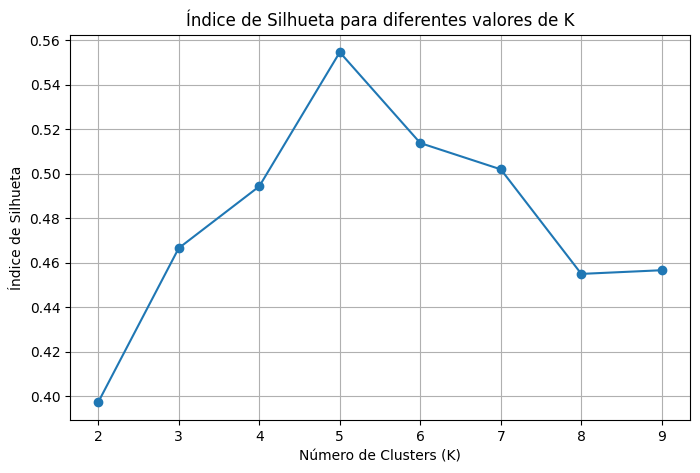


N√∫mero ideal de clusters com base no √≠ndice de Silhueta: K=5

M√©tricas de valida√ß√£o para K-Means:
√çndice de Silhueta: 0.5547
√çndice de Calinski-Harabasz: 248.6493
√çndice de Davies-Bouldin: 0.5722


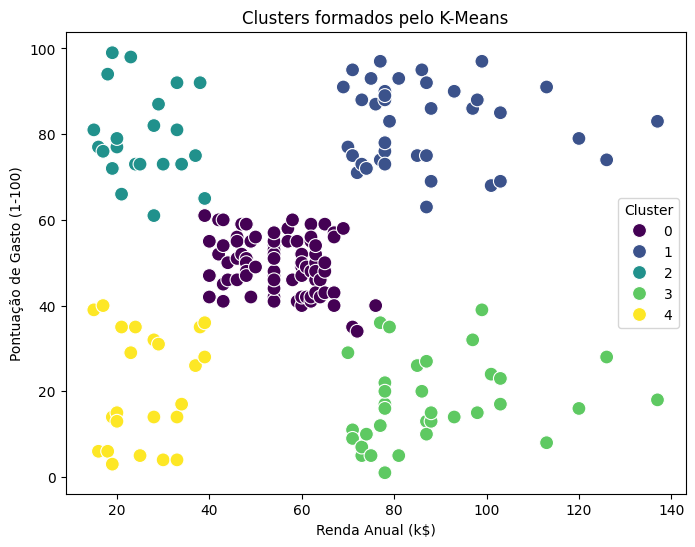


Aplicando o DBSCAN...
√çndice de Silhueta para DBSCAN: 0.3504


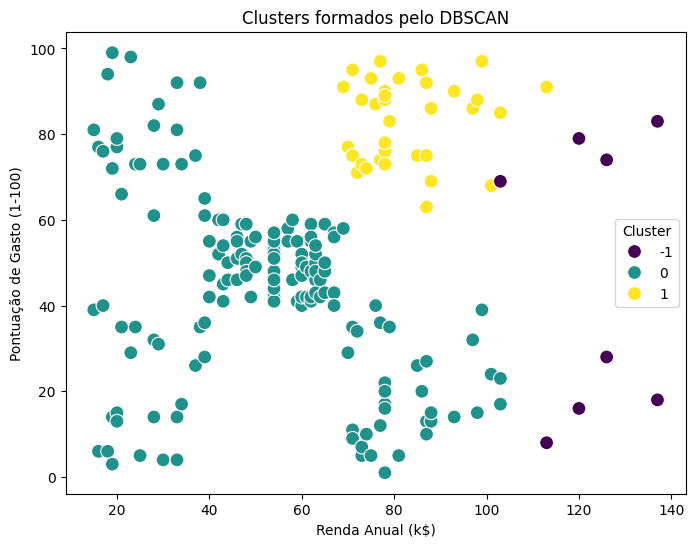


Compara√ß√£o dos modelos:
K-Means: N√∫mero de clusters = 5
DBSCAN: N√∫mero de clusters = 2

Gerando arquivo 'requirements.txt'...
Arquivo 'requirements.txt' gerado com sucesso!


In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar a base de dados
print("Carregando a base de dados 'Mall_Customers.csv'...")
data = pd.read_csv('Mall_Customers.csv')
data = data.rename(columns=lambda x: x.strip())  # Remover espa√ßos nos nomes das colunas
display("Amostra dos dados:\n", data.head())

# 2. Selecionar as colunas relevantes
selected_columns = ['Annual Income (k$)', 'Spending Score (1-100)']
data_subset = data[selected_columns]

# 3. Pr√©-processamento: Normaliza√ß√£o
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)
display("Dados normalizados:", pd.DataFrame(data_scaled, columns=selected_columns).head())

# 4. Escolher o n√∫mero de clusters usando o √≠ndice de Silhueta
print("Calculando o √≠ndice de Silhueta para diferentes valores de K...")
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette)
    print(f"K={k}, √çndice de Silhueta={silhouette:.4f}")

# Visualizar o √≠ndice de Silhueta
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('√çndice de Silhueta para diferentes valores de K')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('√çndice de Silhueta')
plt.grid()
plt.show()

# Escolher K com maior √≠ndice de Silhueta
best_k = k_values[np.argmax(silhouette_scores)]
print(f"N√∫mero ideal de clusters com base no √≠ndice de Silhueta: K={best_k}")

# 5. Criar modelo K-Means com K √≥timo
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['Cluster_KMeans'] = kmeans_labels

# 6. Avaliar o modelo com outras m√©tricas
calinski = calinski_harabasz_score(data_scaled, kmeans_labels)
davies = davies_bouldin_score(data_scaled, kmeans_labels)
print(f"M√©tricas de valida√ß√£o para K-Means:")
print(f"√çndice de Silhueta: {silhouette_scores[np.argmax(silhouette_scores)]:.4f}")
print(f"√çndice de Calinski-Harabasz: {calinski:.4f}")
print(f"√çndice de Davies-Bouldin: {davies:.4f}")

# Visualiza√ß√£o dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster_KMeans'], palette='viridis', s=100)
plt.title('Clusters formados pelo K-Means')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontua√ß√£o de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

# 7. DBSCAN
print("Aplicando o DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['Cluster_DBSCAN'] = dbscan_labels

# √çndice de Silhueta para DBSCAN (caso aplic√°vel)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
    print(f"√çndice de Silhueta para DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN gerou apenas um cluster, √çndice de Silhueta n√£o aplic√°vel.")

# Visualiza√ß√£o dos clusters do DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster_DBSCAN'], palette='viridis', s=100)
plt.title('Clusters formados pelo DBSCAN')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontua√ß√£o de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

# Comparar K-Means e DBSCAN
print("Compara√ß√£o dos modelos:")
print(f"K-Means: N√∫mero de clusters = {best_k}")
print(f"DBSCAN: N√∫mero de clusters = {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

# 8. Criar arquivo requirements.txt
print("\nGerando arquivo 'requirements.txt'...")
with open('requirements.txt', 'w') as f:
    f.write("numpy")
    f.write("pandas")
    f.write("scikit-learn")
    f.write("matplotlib")
    f.write("seaborn")
print("Arquivo 'requirements.txt' gerado com sucesso!")